In [18]:
import pandas as pd
from collections import Counter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("news_headlines.csv")
df

,Headline
0,Top Tory MP defects to Labour in fury at NHS c...
1,Threat of summer poll a tactic to ward off Sun...
2,Disgraced former Hollywood producer Harvey Wei...
3,‘Indefensible’: UK prisoner jailed for 23 mont...
4,London’s Central drama school axes audition fe...
...,...
113,A look into Melbourne’s live music scene over ...
114,Dyeing art: Ptolemy Mann’s vibrant thread pain...
115,Original Observer Photography
116,"‘There aren’t many fields, so the children pla..."


In [20]:
print("Toplam başlık sayısı:", len(df))

Toplam başlık sayısı: 118


In [21]:
df["Headline"] = df["Headline"].str.lower()

In [22]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

df["Headline"] = df["Headline"].apply(remove_stopwords)
print(df)

                                              Headline
0           top tory mp defects labour fury nhs crisis
1    threat summer poll tactic ward sunak revolt , ...
2    disgraced former hollywood producer harvey wei...
3    ‘ indefensible ’ : uk prisoner jailed 23 month...
4    london ’ central drama school axes audition fe...
..                                                 ...
113  look melbourne ’ live music scene 50 years – p...
114  dyeing art : ptolemy mann ’ vibrant thread pai...
115                      original observer photography
116  ‘ ’ many fields , children play around pier ’ ...
117                      week around world 20 pictures

[118 rows x 1 columns]


In [23]:
def remove_punctuation(text):
    words = word_tokenize(text)
    cleaned_words = [word for word in words if word.isalnum()]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

df["Headline"] = df["Headline"].apply(remove_punctuation)

print(df)

                                              Headline
0           top tory mp defects labour fury nhs crisis
1    threat summer poll tactic ward sunak revolt sa...
2    disgraced former hollywood producer harvey wei...
3    indefensible uk prisoner jailed 23 months kill...
4    london central drama school axes audition fees...
..                                                 ...
113  look melbourne live music scene 50 years pictures
114  dyeing art ptolemy mann vibrant thread paintin...
115                      original observer photography
116  many fields children play around pier jelly fe...
117                      week around world 20 pictures

[118 rows x 1 columns]


In [24]:
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Furkan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Furkan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
sid = SentimentIntensityAnalyzer()

headlines = df["Headline"].tolist()

In [34]:
# Her başlık için duygu skoru hesaplıyoruz
for headline in headlines:
    print("Başlık:", headline)
    words = nltk.word_tokenize(headline)
    compound_score = 0
    for word in words:
        scores = sid.polarity_scores(word)
        compound_score += scores['compound']
    average_score = compound_score / len(words)
    print("Duygu Skoru:", average_score)
    print()

Başlık: top tory mp defects labour fury nhs crisis
Duygu Skoru: -0.17454999999999998

Başlık: threat summer poll tactic ward sunak revolt say senior tories
Duygu Skoru: -0.052669999999999995

Başlık: disgraced former hollywood producer harvey weinstein hospitalized
Duygu Skoru: -0.06554285714285714

Başlık: indefensible uk prisoner jailed 23 months killed held 17 years
Duygu Skoru: -0.17067000000000002

Başlık: london central drama school axes audition fees end elite grip arts
Duygu Skoru: 0.0

Başlık: sunak rise asylum seekers ireland proves rwanda plan impact
Duygu Skoru: 0.0

Başlık: spain pm sánchez could quit attacks wife bid politically kill
Duygu Skoru: -0.11312

Başlık: kristi noem dogged poor polling amid fallout tale killing puppy
Duygu Skoru: -0.11364

Başlık: almost beyond belief axing uk teacher recruitment scheme worsen crisis say critics
Duygu Skoru: -0.11929166666666667

Başlık: gold pocket watch richest man titanic fetches
Duygu Skoru: 0.07524285714285714

Başlık: woul

In [27]:
# Her bir başlık için duygu skorlarına göre başlığı sınıflandırma
classified_headlines = []
for headline in headlines:
    scores = sid.polarity_scores(headline)
    if scores['compound'] > 0.1:
        classified_headlines.append('Positive')
    elif scores['compound'] < -0.1:
        classified_headlines.append('Negative')
    else:
        classified_headlines.append('Neutral')

df["Sentiment"] = classified_headlines
df

,Headline,Sentiment
0,top tory mp defects labour fury nhs crisis,Negative
1,threat summer poll tactic ward sunak revolt sa...,Negative
2,disgraced former hollywood producer harvey wei...,Negative
3,indefensible uk prisoner jailed 23 months kill...,Negative
4,london central drama school axes audition fees...,Neutral
...,...,...
113,look melbourne live music scene 50 years pictures,Neutral
114,dyeing art ptolemy mann vibrant thread paintin...,Positive
115,original observer photography,Positive
116,many fields children play around pier jelly fe...,Positive


In [28]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts

Sentiment
Negative    51
Positive    42
Neutral     25
Name: count, dtype: int64

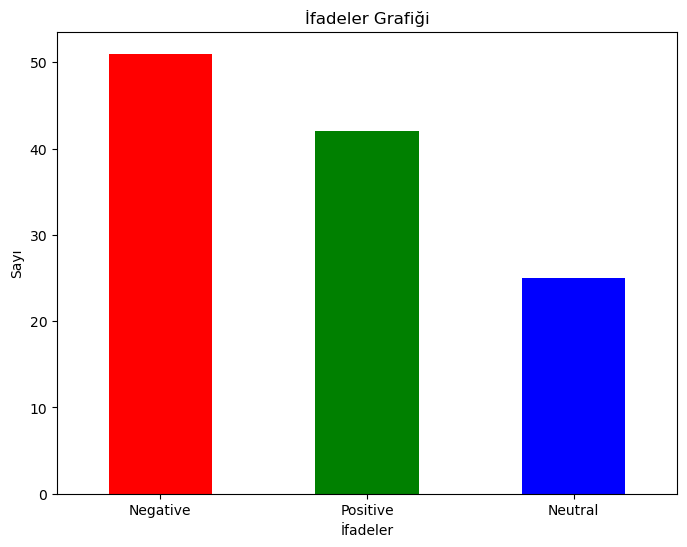

In [29]:
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('İfadeler Grafiği')
plt.xlabel('İfadeler')
plt.ylabel('Sayı')
plt.xticks(rotation=0)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

In [31]:
X_train,X_test,y_train,y_test = train_test_split(df["Headline"],df["Sentiment"],
                                                 test_size=0.25,random_state=42)

In [32]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Doğru Sınıflandırma Oranı:", accuracy)
print(classification_report(y_test, y_pred))

Doğru Sınıflandırma Oranı: 0.5333333333333333
              precision    recall  f1-score   support

    Negative       0.48      1.00      0.65        10
     Neutral       0.00      0.00      0.00         9
    Positive       0.67      0.55      0.60        11

    accuracy                           0.53        30
   macro avg       0.38      0.52      0.42        30
weighted avg       0.40      0.53      0.44        30



E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
